### Datawhale 零基础入门CV赛事-Task1 赛题理解
本章内容将会对街景字符识别赛题进行赛题背景讲解，对赛题数据的读取进行说明，并给出集中解题思路。

#### 1 赛题简介
《1》赛题地址：https://tianchi.aliyun.com/competition/entrance/531795/introduction 
《2》赛题名称：零基础入门CV之街道字符识别
《3》赛题目标：通过这道赛题可以引导大家走入计算机视觉的世界，主要针对竞赛选手上手视觉赛题，提高对数据建模能力。
《4》赛题任务：赛题以计算机视觉中字符识别为背景，要求选手预测街道字符编码，这是一个典型的字符识别问题。
注解：为了简化赛题难度，赛题数据采用公开数据集SVHN，因此大家可以选择很多相应的paper作为思路参考。

#### 2 赛题数据

《1》数据样本简介
赛题以街道字符为为赛题数据，数据集报名后可见并可下载，该数据来自收集的SVHN街道字符，并进行了匿名采样处理。
train训练集数据包括3W张照片。
val验证集数据包括1W张照片。
注释： 每张照片包括颜色图像和对应的编码类别和具体位置；为了保证比赛的公平性，测试集A包括4W张照片，测试集B包括4W张照片。
本赛题需要选手识别图片中所有的字符，为了降低比赛难度，我们提供了训练集、验证集和测试集中字符的位置框。

《2》数据标签
对于训练数据每张图片将给出对于的编码标签，和具体的字符框的位置（训练集、测试集和验证集都给出字符位置），可用于模型训练：
Field	Description
top	   左上角坐标X
height	字符高度
left	左上角最表Y
width	字符宽度
label	字符编码
注释：在比赛数据（训练集、测试集和验证集）中，同一张图片中可能包括一个或者多个字符，因此在比赛数据的JSON标注中，会有多个字符的边框信息


#### 3 评测标准
评价标准为准确率，选手提交结果与实际图片的编码进行对比，以编码整体识别准确率为评价指标，结果越大越好，具体计算公式如下：
score= 编码识别正确的数量 / 测试集图片数量


#### 4 读取数据
《1》抽查一下train训练样本，以观察大致特点，对训练样本有个大致的抽象概论，获得一些抽象结论
《2》根据这些抽象结论去思考一个初步的解决方案。

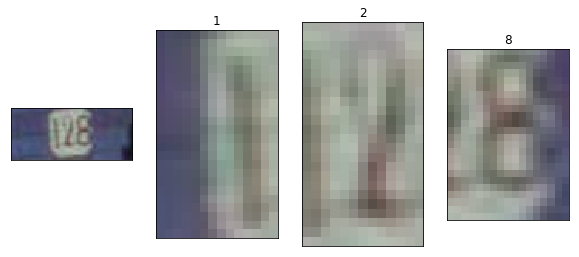

In [13]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt


train_json = json.load(open('./data/mchar_train.json'))


# 数据标注处理
def parse_json(d):
   arr = np.array([
       d['top'], d['height'], d['left'],  d['width'], d['label']
   ])
   arr = arr.astype(int)
   return arr


img = cv2.imread('./data/mchar_train/000008.png')
arr = parse_json(train_json['000008.png'])

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

##《1》可见多个样本都是包含多个数字的img，其中以单个数字为目标y1，y2，，，yn构成一个多目标y标记数据{左上角坐标，标注框大小，label}
##《2》根据此大致的抽象概论，以思考怎么解决预测label。用什么方法，怎么处理等。

#### 5 解题思路

《1》此赛题本质是分类问题，需要对图片中的字符进行识别。
《2》赛题不同的样本图片中包含的字符数量不一样。多定位多分类问题。
《3》难点是需要对不定长字符进行识别，与传统的图像分类任务有所不同。

《4》思路1：作为定长字符识别问题处理
    可以将赛题抽象为一个定长字符识别问题，在赛题数据集中大部分图像中字符个数为2-4个，最多的字符 个数为6个。因此可以对于所有的图像都抽象为6个字符的识别问题，字符23填充为23XXXX，字符231填充为231XXX。
《5》思路2： 专业字符识别思路：不定长字符识别
    在字符识别研究中，有特定的方法来解决此种不定长的字符识别问题，比较典型的有CRNN字符识别模型。在本次赛题中给定的图像数据都比较规整，可以视为一个单词或者一个句子。
《5》思路2：作为目标检测解决此问题
    可以使用如YOLO模型，对img全图做，字符目标的定位与分类识别处理。
